## Market Dataset

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor 

from sklearn.metrics import mean_absolute_error, r2_score

### Load dataset

In [2]:
df = pd.read_csv("D:\Data Analysis\Market TY\Overall Dataset 2015-25.csv")
df.head()

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Normal RainFall in mm,Actual RainFall in mm,% To Normal RainFall (In %),Area Under Cultivation for Spyabean (Lakh Hectare) in maharashtra,Soyabean Total Production in India Lakh Tonnes,Soyabean Export in Crore Rs by India,Soyabean Import in Crore Rs by India
0,Maharashtra,Ahmednagar,Karjat,Yellow,Oil Seeds,1,4000,4500,4000.0,21-Mar-25,1075.3,1251.0,116.339626,50.51,133.6,12171.0,832.0
1,Maharashtra,Akola,Akola,Yellow,Oil Seeds,206.9,3400,4100,4000.0,21-Mar-25,1075.3,1251.0,116.339626,50.51,133.6,12171.0,832.0
2,Maharashtra,Amarawati,Varud(Rajura Bazar),Yellow,Oil Seeds,0.1,3805,3805,3805.0,21-Mar-25,1075.3,1251.0,116.339626,50.51,133.6,12171.0,832.0
3,Maharashtra,Buldhana,Deoulgaon Raja,Yellow,Oil Seeds,3,3700,3700,3700.0,21-Mar-25,1075.3,1251.0,116.339626,50.51,133.6,12171.0,832.0
4,Maharashtra,Dharashiv(Usmanabad),Tuljapur,Other,Oil Seeds,6,4000,4000,4000.0,21-Mar-25,1075.3,1251.0,116.339626,50.51,133.6,12171.0,832.0


### Understand Dataset

In [3]:
df.shape

(189301, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189301 entries, 0 to 189300
Data columns (total 17 columns):
 #   Column                                                             Non-Null Count   Dtype  
---  ------                                                             --------------   -----  
 0   State Name                                                         189301 non-null  object 
 1   District Name                                                      189301 non-null  object 
 2   Market Name                                                        189301 non-null  object 
 3   Variety                                                            189301 non-null  object 
 4   Group                                                              189301 non-null  object 
 5   Arrivals (Tonnes)                                                  189287 non-null  object 
 6   Min Price (Rs./Quintal)                                            189301 non-null  int64  
 7   Max Price (

In [5]:
df.isnull().sum()

State Name                                                            0
District Name                                                         0
Market Name                                                           0
Variety                                                               0
Group                                                                 0
Arrivals (Tonnes)                                                    14
Min Price (Rs./Quintal)                                               0
Max Price (Rs./Quintal)                                               0
Modal Price (Rs./Quintal)                                             0
Reported Date                                                         0
Normal RainFall in mm                                                 0
Actual RainFall in mm                                                 0
% To Normal RainFall (In %)                                           0
Area Under Cultivation for Spyabean (Lakh Hectare) in maharashtr

In [6]:
# Arrivals has 14 null values, this is small we can either delete or fill with median
# Median is better than mean because arrivals can have outliers.

df['Arrivals (Tonnes)'] = pd.to_numeric(df['Arrivals (Tonnes)'], errors='coerce')

df['Arrivals (Tonnes)'] = df['Arrivals (Tonnes)'].fillna(
        df['Arrivals (Tonnes)'].median()
    )

In [7]:
df.isnull().sum()

State Name                                                           0
District Name                                                        0
Market Name                                                          0
Variety                                                              0
Group                                                                0
Arrivals (Tonnes)                                                    0
Min Price (Rs./Quintal)                                              0
Max Price (Rs./Quintal)                                              0
Modal Price (Rs./Quintal)                                            0
Reported Date                                                        0
Normal RainFall in mm                                                0
Actual RainFall in mm                                                0
% To Normal RainFall (In %)                                          0
Area Under Cultivation for Spyabean (Lakh Hectare) in maharashtra    0
Soyabe

In [8]:
# Convert Date Column
df['Reported Date'] = pd.to_datetime(df['Reported Date'], format="%d-%b-%y")


# Extract values
df['Day'] = df['Reported Date'].dt.day
df['Month'] = df['Reported Date'].dt.month
df['Year'] = df['Reported Date'].dt.year

In [9]:
# Drop original Date column
df.drop("Reported Date", axis = 1, inplace = True)
df.head()

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Normal RainFall in mm,Actual RainFall in mm,% To Normal RainFall (In %),Area Under Cultivation for Spyabean (Lakh Hectare) in maharashtra,Soyabean Total Production in India Lakh Tonnes,Soyabean Export in Crore Rs by India,Soyabean Import in Crore Rs by India,Day,Month,Year
0,Maharashtra,Ahmednagar,Karjat,Yellow,Oil Seeds,1.0,4000,4500,4000.0,1075.3,1251.0,116.339626,50.51,133.6,12171.0,832.0,21,3,2025
1,Maharashtra,Akola,Akola,Yellow,Oil Seeds,206.9,3400,4100,4000.0,1075.3,1251.0,116.339626,50.51,133.6,12171.0,832.0,21,3,2025
2,Maharashtra,Amarawati,Varud(Rajura Bazar),Yellow,Oil Seeds,0.1,3805,3805,3805.0,1075.3,1251.0,116.339626,50.51,133.6,12171.0,832.0,21,3,2025
3,Maharashtra,Buldhana,Deoulgaon Raja,Yellow,Oil Seeds,3.0,3700,3700,3700.0,1075.3,1251.0,116.339626,50.51,133.6,12171.0,832.0,21,3,2025
4,Maharashtra,Dharashiv(Usmanabad),Tuljapur,Other,Oil Seeds,6.0,4000,4000,4000.0,1075.3,1251.0,116.339626,50.51,133.6,12171.0,832.0,21,3,2025


In [10]:
# Market Prices - Min Price, Max Price, Modal Price
# Target Column - Modal Price(Rs/Quintal) Bacause most realistic market price
target = "Modal Price (Rs./Quintal)"

### Encode Categorical Columns
#### State Name, District Name, Market Name, Variety, Group
Convert Them to numbers

In [11]:
categorical_cols = ['State Name', 'District Name', 'Market Name', 'Variety', 'Group']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
    
# Data converted to numeric

### Split target and features

In [12]:
X = df.drop(target, axis = 1)
y = df[target]

### Train Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
# test = 20%, train = 80%
)

### Train Model
#### For large dataset - Random Forest, Gradient Boosting, XGBoost

### Random Forest

In [14]:
model = RandomForestRegressor(
    n_estimators = 200,
    random_state = 42
)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

### Model Evaluation

In [15]:
y_pred = model.predict(X_test)
print("Mean Absolute Error : ", mean_absolute_error(y_test, y_pred))
print("R2 Score : ", r2_score(y_test, y_pred))

Mean Absolute Error :  50.32676105755263
R2 Score :  0.9900279016827556


### On average, your model’s predicted Modal Price is off by only: Rs. 50 per Quintal
### R² = 0.99002 - 99% of the variation in Modal Price. 

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

importance = model.feature_importances_
features = X.columns

imp_df = pd.DataFrame({
    "Feature": features,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

print(imp_df.head(10))


# This tells:
# Rainfall affects price?
# Arrivals affect price?
# Market affects price?

                                 Feature  Importance
7                Max Price (Rs./Quintal)    0.961133
6                Min Price (Rs./Quintal)    0.018873
2                            Market Name    0.009416
5                      Arrivals (Tonnes)    0.002672
1                          District Name    0.002146
16                                 Month    0.001193
15                                   Day    0.001107
17                                  Year    0.000744
9                  Actual RainFall in mm    0.000482
13  Soyabean Export in Crore Rs by India    0.000440


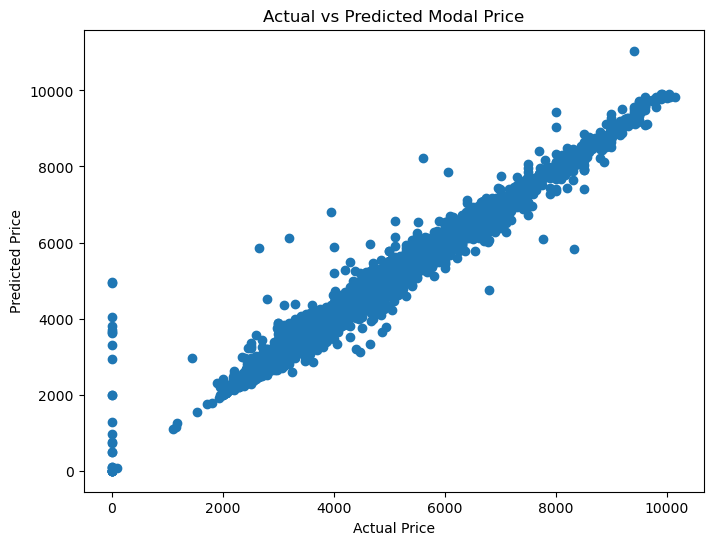

In [19]:
# Visualisation
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Modal Price")
plt.show()